

```
# Importando Bibliotecas

```



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


irisDF = pd.read_csv("Iris.csv")
display(irisDF)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Vendo se tem algum valor não preenchido


In [3]:
display(irisDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [ ]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Dividindo dados de Teste e Treino e Dados de X e de Y 

In [4]:
#dados de x e dados de y
colunas_drop = ["Id", "Species"]
y = irisDF["Species"]
x = irisDF.drop(columns=colunas_drop)

#treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3, random_state= 1)

# Importanto Modelos de Aprendizado de Máquina
## KNN
## Árvore de Decisão

In [8]:
from sklearn.ensemble import RandomForestClassifier #KNN
from sklearn.neighbors import KNeighborsClassifier #Árvore de Decisão

k = 3
modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier(n_neighbors= k)

modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

# Comparando os dois Modelos

In [30]:
from sklearn.metrics import accuracy_score

previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

print(f"Precisão Árvore de Decisões: {accuracy_score(y_teste, previsao_arvore):.2f}") #Precisão do Modelo Árvore de Decisão
print(f"Precisão KNN: {accuracy_score(y_teste, previsao_knn):.2f}") #Precisão do Modelo KNN

Precisão Árvore de Decisões: 0.96
Precisão KNN: 0.98


In [23]:
classes_predicao = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_teste, previsao_knn, target_names= classes_predicao))
print(classification_report(y_teste, previsao_arvore, target_names=classes_predicao))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# Matriz Confusão dos dois Modelos

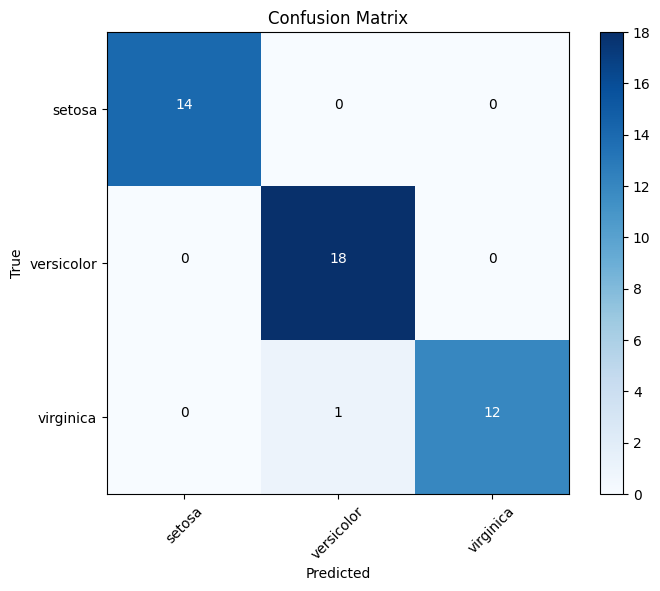

In [27]:
# Matriz Confusão do KNN
cm = confusion_matrix(y_teste, previsao_knn)


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = classes_predicao
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()

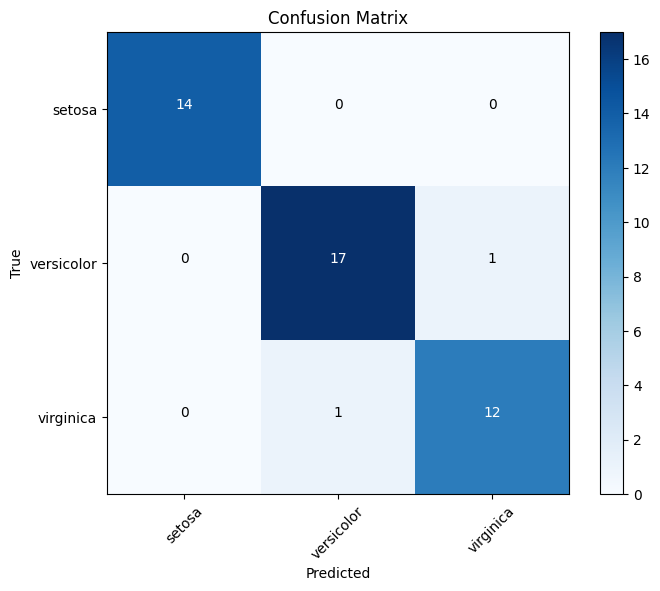

In [28]:
# Matriz Confusão da Arvore
cm = confusion_matrix(y_teste, previsao_arvore)


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = classes_predicao
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()

**# Plotando o Gráfico Boxplot**

<Axes: >

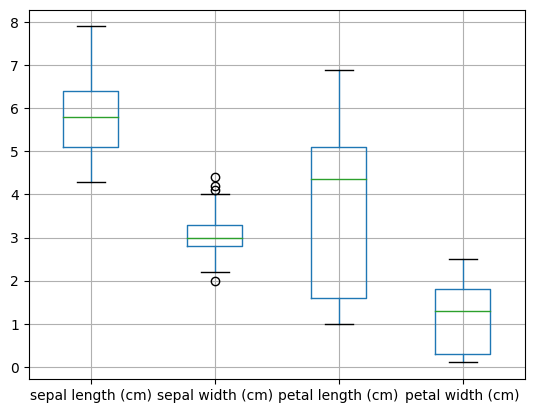

In [ ]:
irisDF.boxplot()